In [9]:
import os
import random
import warnings

import matplotlib.pyplot as plt
import simplstyles
import numpy as np
import pandas as pd
import seaborn as sns
from himalaya.backend import set_backend

from compare_variance_residual.simulation.residual_method import residual_method
from compare_variance_residual.simulation.dataset import generate_dataset
from compare_variance_residual.simulation.variance_partitioning import variance_partitioning

In [10]:
def get_path():
    path = os.path.join("results", "varying training samples")
    os.makedirs(path, exist_ok=True)
    return path

In [11]:
def save_scores(samples_train, n_samples_test):
    path = get_path()
    for n_samples_train in samples_train:
        print(n_samples_train)
        csv_path = os.path.join(path, f"scores_{n_samples_train}.csv")
        scores = pd.DataFrame()
        if os.path.exists(csv_path):
            print("skipping, already exists")
            continue
        Xs, Y = generate_dataset(n_samples=n_samples_train + n_samples_test)
        print("data generated")
        x1_score, x2_score, joint_score, x1_and_x2_score, vp_x1_unique_score, vp_x2_unique_score = variance_partitioning(
            Xs, Y, n_samples_train)
        print("variance partitioning done")

        scores["x1_score"] = x1_score
        scores["x2_score"] = x2_score
        scores["vp_joint_score"] = joint_score
        scores["vp_shared_score"] = x1_and_x2_score
        scores["vp_x1_unique_score"] = vp_x1_unique_score
        scores["vp_x2_unique_score"] = vp_x2_unique_score
        del x1_score, x2_score, joint_score, x1_and_x2_score, vp_x1_unique_score, vp_x2_unique_score

        x2_to_x1_score, x1_to_x2_score, rm_x1_unique_score, rm_x2_unique_score = residual_method(
            Xs, Y, n_samples_train)
        print("residual method done")
        scores["rm_x2_to_x1_score"] = np.concatenate(
            [x2_to_x1_score, np.full(len(rm_x1_unique_score) - len(x2_to_x1_score), np.nan)])
        scores["rm_x1_to_x2_score"] = np.concatenate(
            [x1_to_x2_score, np.full(len(rm_x1_unique_score) - len(x1_to_x2_score), np.nan)])
        scores["rm_x1_unique_score"] = rm_x1_unique_score
        scores["rm_x2_unique_score"] = rm_x2_unique_score
        print(scores.head())
        del x2_to_x1_score, x1_to_x2_score, rm_x1_unique_score, rm_x2_unique_score

        # ridge residual
        x2_to_x1_ridge_score, x1_to_x2_ridge_score, rm_ridge_x1_unique_score, rm_ridge_x2_unique_score = residual_method(
            Xs, Y, n_samples_train, use_ols=False)
        print("residual method done")
        scores["rm_ridge_x2_to_x1_score"] = np.concatenate(
            [x2_to_x1_ridge_score, np.full(len(rm_ridge_x1_unique_score) - len(x2_to_x1_ridge_score), np.nan)])
        scores["rm_ridge_x1_to_x2_score"] = np.concatenate(
            [x1_to_x2_ridge_score, np.full(len(rm_ridge_x1_unique_score) - len(x1_to_x2_ridge_score), np.nan)])
        scores["rm_ridge_x1_unique_score"] = rm_ridge_x1_unique_score
        scores["rm_ridge_x2_unique_score"] = rm_ridge_x2_unique_score
        print(scores.head())
        del x2_to_x1_ridge_score, x1_to_x2_ridge_score, rm_ridge_x1_unique_score, rm_ridge_x2_unique_score
        del Xs, Y
        scores.to_csv(csv_path, index=False)

# Save scores for varying training samples

In [12]:
backend = set_backend("torch_cuda", on_error="warn")
warnings.filterwarnings("ignore")
random.seed(42)
plt.style.use('nord-light-talk')

In [13]:
d_list = [100, 100, 100]
n_targets = 10000
n_samples_test = 10000

In [14]:
import math

numsteps = 20
samples_train = np.logspace(math.log(301, 10), math.log(30000.5, 10), numsteps).astype(int)
samples_train

array([  300,   383,   488,   622,   793,  1010,  1287,  1640,  2089,
        2662,  3391,  4321,  5505,  7014,  8936, 11386, 14506, 18482,
       23547, 30000])

In [15]:
save_scores(samples_train, n_samples_test)

300
skipping, already exists
383
skipping, already exists
488
skipping, already exists
622
skipping, already exists
793
skipping, already exists
1010
skipping, already exists
1287
skipping, already exists
1640
skipping, already exists
2089
skipping, already exists
2662
skipping, already exists
3391
skipping, already exists
4321
skipping, already exists
5505
skipping, already exists
7014
skipping, already exists
8936
skipping, already exists
11386
skipping, already exists
14506
skipping, already exists
18482
skipping, already exists
23547
skipping, already exists
30000
skipping, already exists


# Load scores

In [16]:
vp = pd.DataFrame()
rm = pd.DataFrame()
rm_ridge = pd.DataFrame()

for i, n_samples_train in enumerate(samples_train):
    scores = pd.read_csv(os.path.join(get_path(), f"scores_{n_samples_train}.csv"))
    vp_scores = pd.DataFrame({
        'n_samples_train': [n_samples_train] * len(scores),
        'vp_x1_unique_score': scores['vp_x1_unique_score'],
    }, index=range(len(scores)))

    rm_scores = pd.DataFrame({
        'n_samples_train': [n_samples_train] * len(scores),
        'rm_x1_unique_score': scores['rm_x1_unique_score'],
    }, index=range(len(scores)))

    rm_ridge_scores = pd.DataFrame({
        'n_samples_train': [n_samples_train] * len(scores),
        'rm_ridge_x1_unique_score': scores['rm_ridge_x1_unique_score'],
    }, index=range(len(scores)))

    vp = pd.concat([vp, vp_scores], ignore_index=True)
    rm = pd.concat([rm, rm_scores], ignore_index=True)
    rm_ridge = pd.concat([rm_ridge, rm_ridge_scores], ignore_index=True)
vp.head()
rm.head()

,n_samples_train,rm_x1_unique_score
0,300,0.000292
1,300,0.000274
2,300,0.000356
3,300,0.000256
4,300,0.000367


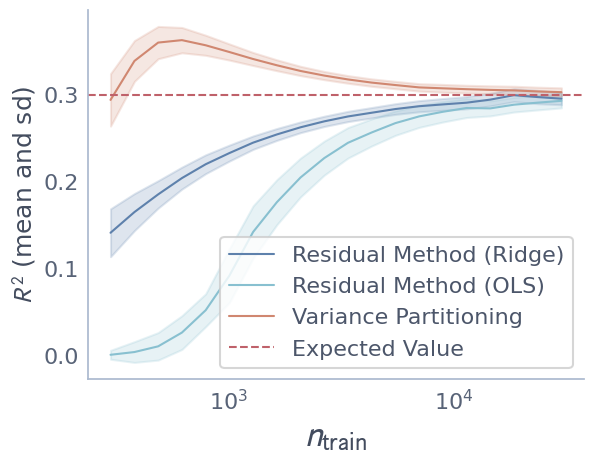

In [18]:
import matplotlib as mpl
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
hue_order = ['Residual Method', 'Variance Partitioning', ]
g = sns.lineplot(data=rm_ridge, x='n_samples_train', y='rm_ridge_x1_unique_score', label='Residual Method (Ridge)', errorbar='sd')
sns.lineplot(data=rm, x='n_samples_train', y='rm_x1_unique_score', label='Residual Method (OLS)', errorbar='sd')
sns.lineplot(data=vp, x='n_samples_train', y='vp_x1_unique_score', label='Variance Partitioning', errorbar='sd')
plt.axhline(0.3, linestyle='--', label='Expected Value', color="C3")
plt.xlabel(r"$n_\text{train}$", fontsize=26)
plt.ylabel(r"$R^2$ (mean and sd)")
plt.legend(frameon=True)
# xtick_labels = [str(int(x)) for x in samples_train]
xticks = [x for x in samples_train]
# plt.xticks(xticks, xtick_labels)
# plt.gca().set_xticklabels(xtick_labels)
plt.xscale('log')